#Spotify

###Belhal Karimi

This notebook is presenting a way to do a quick exploratory analysis of a sample dataset of Spotify<br>

First, after having processed the data and quickly explored it, we are going to focus on the comparison of female and male only respecting to to their behavior in terms of minutes spent listening to music, of number of tracks listen over the period of the sample

#Pre-processing and describing the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
print 'Loading the data'
df1 = pd.read_csv("data_sample/end_song_sample.csv", delimiter=',', low_memory = False)
df2 = pd.read_csv("data_sample/user_data_sample.csv", delimiter=',', low_memory = False)

Loading the data


df1 is the datframe of all the song listended to by our sample of users.<br>
df2 is the sample of users (9565) with some metrics about their age, gender...

Prior any description, we can check for the types of each variable:

###Types Description

In [2]:
from IPython.display import display
a = df1.dtypes
b = df2.dtypes
display(a,b)

ms_played          int64
context           object
track_id          object
product           object
end_timestamp    float64
user_id           object
dtype: object

gender            object
age_range         object
country           object
acct_age_weeks     int64
user_id           object
dtype: object

`gender` and `age_range` are categorical. For our study, we may want to change them into float so that we can easily manipulate the variables<br>
`gender` takes two values: <br>
<li>male
<li>female</li>
`age_range` takes 7 values:<br>
<li>0 - 17</li>
<li>18 - 24</li>
<li>25 - 29</li>
<li>30 - 34</li>
<li>35 - 4</li>
<li>45 - 54</li>
<li>55+</li>


###Duplicates

Let's check for duplicates

In [3]:
def is_duplicate(dataframe, dup_var):
    import numpy as np
    df = dataframe.groupby([str(dup_var)])
    df = df.aggregate(np.sum)
    if df.count()[0] != dataframe.shape[0]:
        return "There are duplicates for " + str(dup_var)
    else:
        return "There are no duplicates for " + str(dup_var)

In [4]:
is_duplicate(df1, 'track_id')

'There are duplicates for track_id'

In [5]:
is_duplicate(df2, 'user_id')

'There are no duplicates for user_id'

In [6]:
df2.head()

,gender,age_range,country,acct_age_weeks,user_id
0,male,25 - 29,FR,329,97f47c9fba714ca68320b8a80e010a1a
1,female,45 - 54,US,178,d615ca85849d458e9a5d755ec4727e8f
2,female,18 - 24,DE,68,6c83a5bf63b74f85b106ac7e7e015a1b
3,female,30 - 34,US,8,530fcedb3f244e6f91ecb326740005eb
4,female,30 - 34,FR,42,d2ed6a815eda4f61aa346b7936d03ef7


###Merge dataframes

The first work consist in finding more variables to describe these users thanks to the several metrics we have on df1.<br>
One metric could be the number of track listened by the users.<br>
Another could be the amount of time they listened to music<br>
We can do that by counting number of rows for each user id on table 1 and sum the ms_played -- the amount of time the user listened to this track, in milliseconds for each user id on the same table

In [7]:
df1.count()

ms_played        1342891
context          1342891
track_id         1334790
product          1342891
end_timestamp    1342891
user_id          1342891
dtype: int64

Fortunately, we are only missing around 8000 track_id. Not an issue for our initial problem since we have their information in terms of length played, etc.

In [2]:
#Adding a '1' in front of each row
df1['#tracks'] = pd.Series(int(1), index=df1.index)
#Counting the sum and the count of time spent and number tracks
#Independant of the fact that they listened to the same track several times
#Here, we lose the informations of different behavioral traits towards different songs
df1_count = df1.groupby('user_id')
#Converting the dataframegroupby object into DataFrame
import numpy as np
df1_count = df1_count.aggregate(np.sum)
#Keeping only the two relevant metrics
df2_right = df1_count.loc[:,['ms_played', '#tracks']]

In [3]:
#Setting the user_id as index in the original dataframe df2
df2_left = df2.set_index('user_id')

In [4]:
print (df2_right.shape, df2_left.shape)

((9565, 2), (9565, 4))


We have exactly the same number of users as expected<br>
We can now merge around the indexes (that are the user ids)

In [5]:
df2_concat = pd.concat([df2_left, df2_right], axis=1, join='inner')

We finally have the table needed to study any aspect of the male/female distinction

In [12]:
df2_concat.head()

,gender,age_range,country,acct_age_weeks,ms_played,#tracks
user_id,,,,,,
000eb8799c9344c8853e8a2b57d835ff,male,25 - 29,GB,39,17469466,69
001b9229782940c39f311c3d5fa3bdc9,female,18 - 24,FR,13,176271,15
001cc057631d49ba81e30919dc12920f,female,18 - 24,US,149,811101,8
001eacb8a417475ca5c66600c6333ebc,female,30 - 34,MX,30,4400774,60
001fbc268150424e82b2af6a13b300eb,male,18 - 24,GB,342,23646800,115


###Quick Description

Let's explore this data, process it and consider missing values (if existing)

In [13]:
df2_concat.shape

(9565, 6)

We have 9656 unique users and 6 metrics describing them

In [14]:
df2_concat.describe()

,acct_age_weeks,ms_played,#tracks
count,9565.000000,9.565000e+03,9565.000000
mean,74.094093,1.807069e+07,140.396341
std,76.810872,3.580455e+07,251.625558
min,-1.000000,0.000000e+00,1.000000
25%,15.000000,1.132015e+06,14.000000
50%,49.000000,6.316583e+06,53.000000
75%,113.000000,2.074055e+07,162.000000
max,363.000000,8.793308e+08,4409.000000


We have here a quick description of each variable that matters for our study.<br>
N.B : the count of `#tracks` is not the number of tracks listened in total over the period. It is just counting the number of cell for this variable

In [15]:
df2_concat.isnull().sum()

gender            0
age_range         8
country           0
acct_age_weeks    0
ms_played         0
#tracks           0
dtype: int64

As far as our goal, which is to first compare male and female behaviors, the fact that we're missing some age ranges for users (8) is not an issue.<br>
We'll come up with a strategy to replace those missing values afterwars

###MALE/FEMALE comparison

In [16]:
df2_concat[df2_concat['gender'] == 'male'].describe()

,acct_age_weeks,ms_played,#tracks
count,4979.000000,4.979000e+03,4979.000000
mean,76.941153,1.790857e+07,138.879092
std,80.546788,3.652026e+07,253.254571
min,-1.000000,0.000000e+00,1.000000
25%,15.000000,1.009934e+06,14.000000
50%,49.000000,5.946207e+06,52.000000
75%,116.000000,1.997358e+07,154.000000
max,363.000000,8.793308e+08,4409.000000


In [17]:
df2_concat[df2_concat['gender'] == 'female'].describe()

,acct_age_weeks,ms_played,#tracks
count,4560.000000,4.560000e+03,4560.000000
mean,70.928947,1.827208e+07,142.363596
std,72.493957,3.507273e+07,250.376889
min,-1.000000,0.000000e+00,1.000000
25%,14.000000,1.266826e+06,15.000000
50%,47.000000,6.809666e+06,55.000000
75%,106.000000,2.185648e+07,168.000000
max,357.000000,7.602377e+08,3471.000000


After a quick description of the datsets for both male and female, we can notice that: <br>
<li> Males are a bit more than Females in our sample (52% vs 48%)
<li> Males have an account for longer time than females in average (77 weeks vs. 71 weeks)
<li> In average, on this period, Females listened to spotify longer than males (1.8e+07 = 5.1 hours vs. 1.790857e+07 = 4.9 hours)
<li> Even though in average Females are listening to more music, the 75th percentile meaning the top of the distribution is more active in the male gender than in the female.


###In terms of minutes listened

We can plot side by side the distributions of minutes spent listening to music on spotify, over this psecific period, by male and female

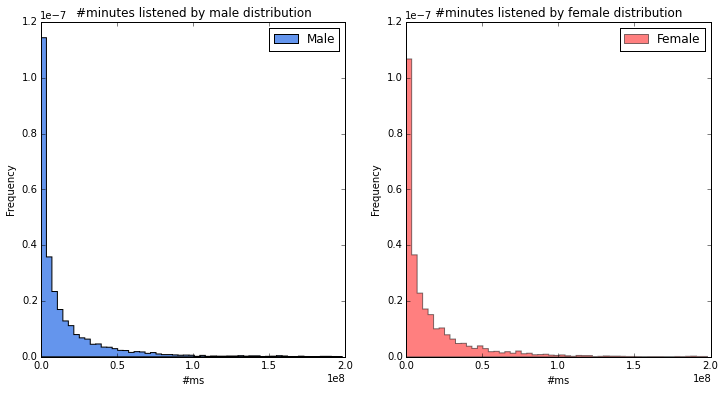

In [18]:
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
Ym = df2_concat[df2_concat['gender'] == 'male']['ms_played']
Yf = df2_concat[df2_concat['gender'] == 'female']['ms_played']
gs1 = gridspec.GridSpec(1,2)
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.hist(Ym, bins=np.arange(0,2.0e+08,3600000), histtype='stepfilled', normed=True, color="#6495ED", label='Male')
plt.title("#minutes listened by male distribution")
plt.xlabel("#ms")
plt.ylabel("Frequency")
plt.legend()
plt.subplot(122)
plt.hist(Yf, bins=np.arange(0,2.0e+08,3600000), histtype='stepfilled', normed=True, color='r', alpha=0.5, label='Female')
plt.title("#minutes listened by female distribution")
plt.xlabel("#ms")
plt.ylabel("Frequency")
plt.legend()
plt.show()

For presentation purposes, the plots were limited to 55 hours (2.0e+08 ms) since both distribution present a very long thin tail afterwards

At his point, we barely see any differences in terms of minutes spent listening to music. <br>
Only the max and mean are relevant (cf describe above)

In [19]:
from scipy import stats
stats.ks_2samp(Ym, Yf)

(0.030786320088230124, 0.021465829941862427)

The p-value is pretty high (0.21) then we cannot reject the hypothesis that the distributions of the two samples are the same

###In terms of number of tracks listened

We can plot side by side the distributions of tracks listened, over this psecific period, by male and female

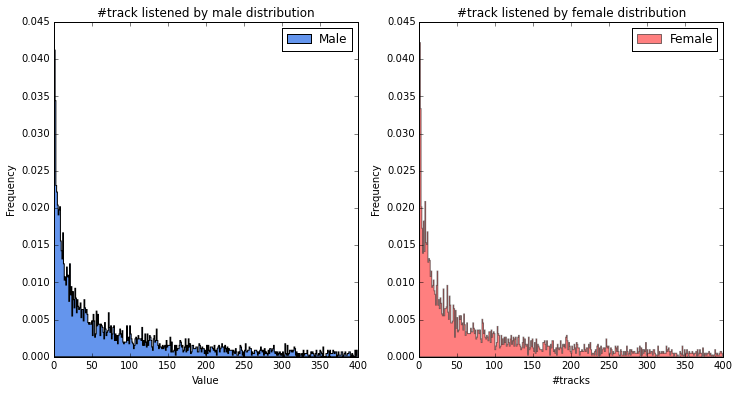

In [20]:
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
Ym = df2_concat[df2_concat['gender'] == 'male']['#tracks']
Yf = df2_concat[df2_concat['gender'] == 'female']['#tracks']
gs1 = gridspec.GridSpec(1,2)
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.hist(Ym, bins=np.arange(0,400,1), histtype='stepfilled', normed=True, color="#6495ED", label='Male')
plt.title("#track listened by male distribution")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend()
plt.subplot(122)
plt.hist(Yf, bins=np.arange(0,400,1), histtype='stepfilled', normed=True, color='r', alpha=0.5, label='Female')
plt.title("#track listened by female distribution")
plt.xlabel("#tracks")
plt.ylabel("Frequency")
plt.legend()

plt.show()

Here again, shapes are very similar

In [21]:
from scipy import stats
stats.ks_2samp(Ym, Yf)

(0.021829931325602625, 0.20437316032534295)

The p-value is pretty high (0.20) then we cannot reject the hypothesis that the distributions of the two samples are the same

####General pairplots

Let's first change the age ranges into integers so that our visualizations work

In [6]:
age_map = {'0 - 17':15, 
           '18 - 24':20, 
           '25 - 29':26, 
           '30 - 34':32, 
           '35 - 44':40,
           '45 - 54':50, 
           '55+':60}

df2_concat = df2_concat.applymap(lambda s: age_map.get(s) if s in age_map else s)
#Imputing missing values with the mean
df2_concat.loc[:, 'age_range'] = df2_concat.loc[:, 'age_range'].fillna(round(df2_concat.loc[:, 'age_range'].mean()))

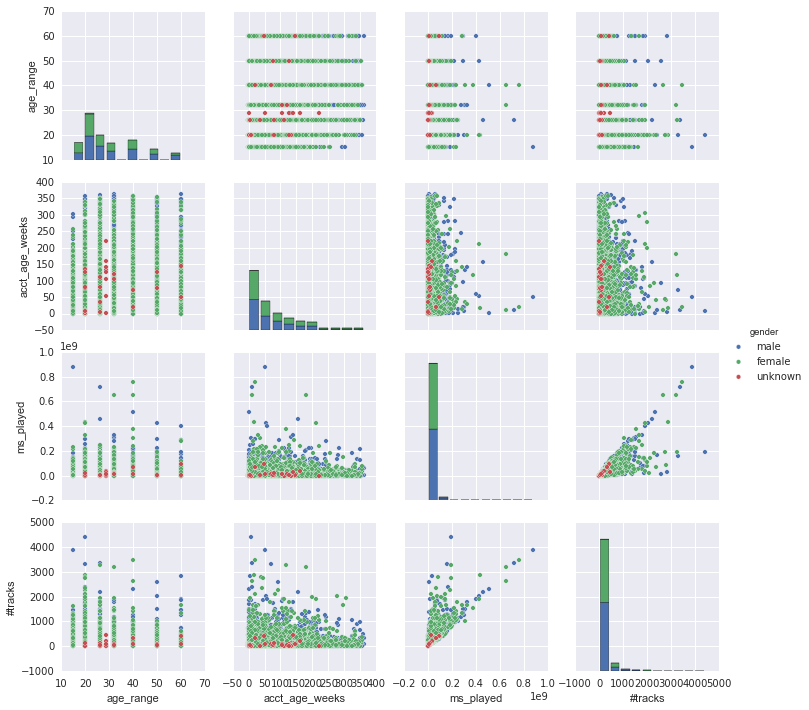

In [24]:
import seaborn as sns
g = sns.pairplot(df2_concat, hue = 'gender')

This pairplot is summing up what was told above in terms of: <br>
<li>tracks played that are slightly more for male than female (plot (4,4))
<li>and that male tend to have older accounts than female (plot (2,1)).
<li> There is no real assumptions that can be made regarding ages except the fact that for all age ranges of men, there are some users that listen to more tracks (plot (4,1))than all of the female except the 30 years old.
<br>
Something interesting would be to do a time series analysis since the creation of Spotify and see if more males had accounts before females

###At this point, it is very hard to say that women and men have different behaviors, even though there are sligh differences in terms of volums of tracks and minutes

#Analysis

## User-centric analysis

###General pairplots according to age ranges groups

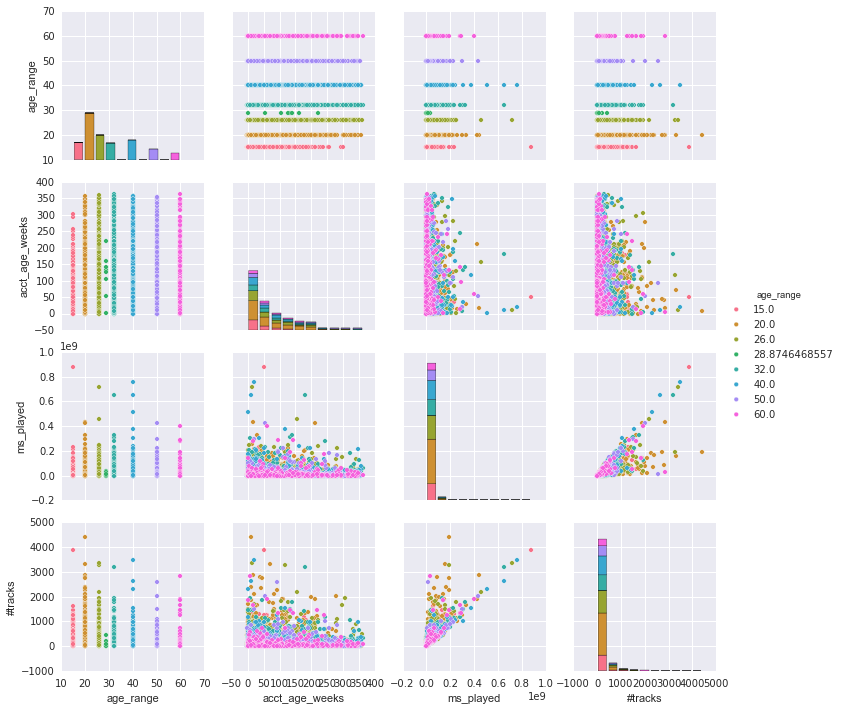

In [30]:
import seaborn as sns
g = sns.pairplot(df2_concat, hue = 'age_range')

Interpretation: <br>
<ul>
<li>Left top corner (age_range) : Mostly 20's users with listeners of 40 years old going back on Spotify
<li>The generation of 18-24 yo seem to have the most old account in average (plot (2,2)) and to listen more tracks (plot(4,4))
<li>There seems to be a relation between the number of tracks listened and the total minutes played. This could mean that even though you listen to more tracks, people use to listen the same amount of time in total

###Nationality wise informations

In [31]:
print "#male.coutries: ",df2_concat[df2_concat['gender'] == 'male']['country'].value_counts().sum()
print "#female.coutries:", df2_concat[df2_concat['gender'] == 'female']['country'].value_counts().sum()
print "total:", df2_concat[df2_concat['gender'] == 'male']['country'].value_counts().sum() + df2_concat[df2_concat['gender'] == 'female']['country'].value_counts().sum()

#male.coutries:  4979
#female.coutries: 4560
total: 9539


Since we have 9565 users, we are only missing country informations for 26 users

###Number of users per country

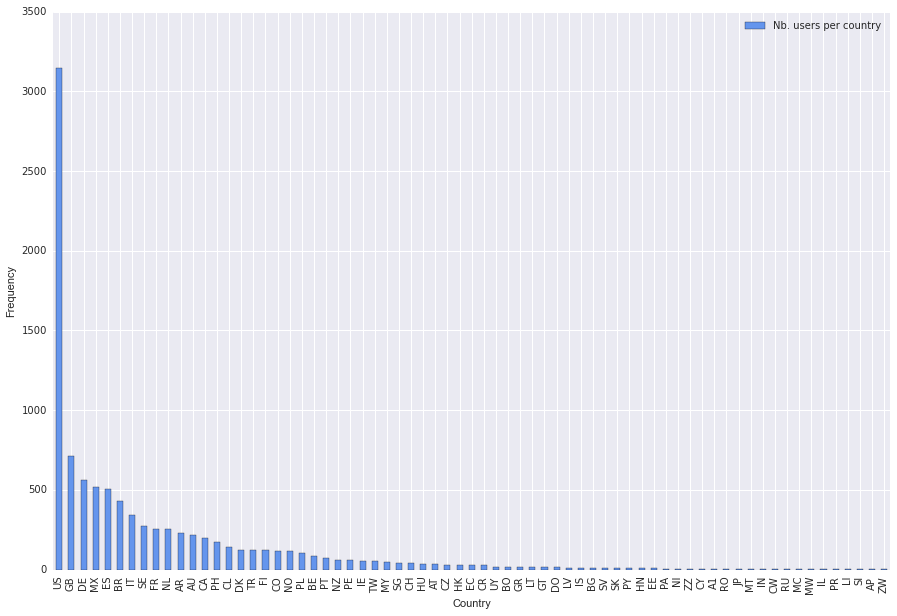

In [32]:
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
f = plt.figure(figsize=(15, 10))
#Datasets

#We convert each count value by their percentage 
#(the values are now percentage of the worldwide male or female population)
Y = df2_concat['country'].value_counts()
countries = list(Y.index)

#male population
populations = list(Y)
data = {'Nb. users per country' : pd.Series(populations, index=countries)}
df = pd.DataFrame(data)

#Plotting
plt.xlabel("Country")
plt.ylabel("Frequency")
df.plot(ax=f.gca(), layout=(1,1),kind='bar', color="#6495ED")


###Breakdown of the users by gender (in percentage)

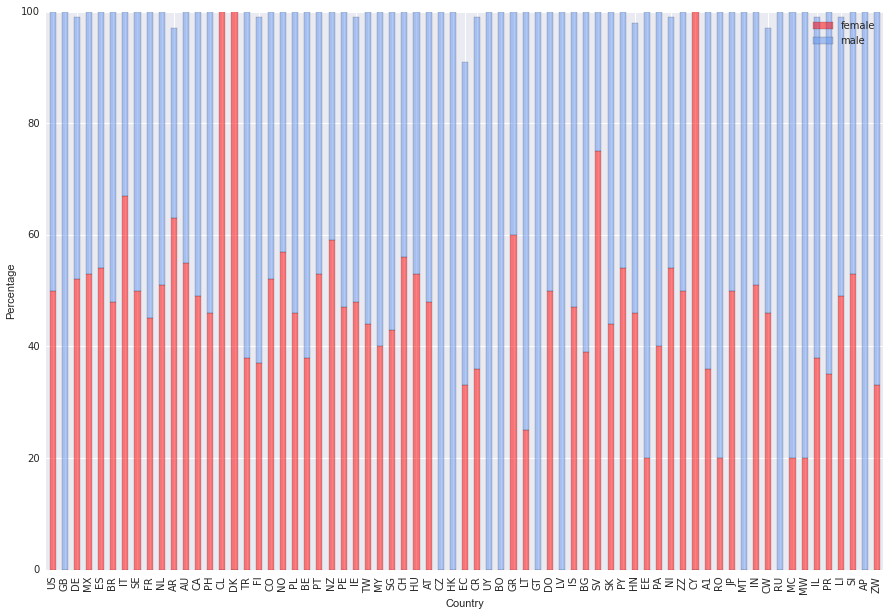

In [34]:
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
f = plt.figure(figsize=(15, 10))
#Datasets

#We convert each count value by their percentage 
#(the values are now percentage of the worldwide male or female population)
Ym = (df2_concat[df2_concat['gender'] == 'male']['country'].value_counts()/df2_concat['country'].value_counts()).fillna(0)
Ym = (Ym*100).round()
Yf = ((df2_concat[df2_concat['gender'] == 'female']['country'].value_counts()/df2_concat['country'].value_counts()).fillna(0))
Yf = (Yf*100).round()
countries = list(Y.index)
countries_m = list(Ym.index)
countries_f = list(Yf.index)
#male population
populations_m = list(Ym)
populations_f = list(Yf)
data_m = {'male' : pd.Series(populations_m, index=countries),
         'female' : pd.Series(populations_f, index=countries)}
dfm = pd.DataFrame(data_m)


#Plotting
plt.xlabel("Country")
plt.ylabel("Percentage")
dfm.plot(ax=f.gca(), layout=(1,1),kind='bar', color=["r", "#6495ED"], stacked = True, alpha=0.5)

This last plot of the number of users in each countries gives an interesting insight on the userbase of Spotify.
While less women are subcribed to Spotify, at least in our sample, a bigger portion of the female population is in the US, GB, AU, Chile and Finland. <br>
One can want to check why english speaking countries would attract more women. Looking through the playlists and top100 of these countries could give some insights

##track-centric analysis

In [36]:
age_map = {'0 - 17':15, 
           '18 - 24':20, 
           '25 - 29':26, 
           '30 - 34':32, 
           '35 - 44':40,
           '45 - 54':50, 
           '55+':60}
df2 = df2.applymap(lambda s: age_map.get(s) if s in age_map else s)
df2.loc[:, 'age_range'] = df2.loc[:, 'age_range'].fillna(round(df2.loc[:, 'age_range'].mean()))

We are going to first merge df1 and df2 to have for each track all the metrics available

In [37]:
dfall = pd.concat([df2, df1], axis=1)

Let's check for duplicates

In [38]:
d = df1.groupby(['track_id'])
import numpy as np
d = d.aggregate(np.sum)
d.count()

ms_played        314985
end_timestamp    314985
#tracks          314985
dtype: int64

There are indeed duplicates. 314985 tracks has been listened in total during the period

<b>Over what period are we analyzing the data?</b>

In [39]:
dfall.min().as_matrix()

array([inf, 15.0, inf, -1.0, inf, 0, 'album', inf, 'basic-desktop',
       1443657600.04, '000eb8799c9344c8853e8a2b57d835ff', 1], dtype=object)

In [40]:
dfall.max().as_matrix()

array(['unknown', 60.0, 'ZZ', 363.0, 'fffa86006fc54810a56e546fa26a249e',
       5100017, 'unknown', 'ffffefdc5ca14a5d9760d6d0b122a7a6', 'premium',
       1444867196.61, 'fffa86006fc54810a56e546fa26a249e', 1], dtype=object)

The period goes from Thu, 01 Oct 2015 00:00:00 GMT to Wed, 14 Oct 2015 23:59:56 GMT

Let's split this period in half and analyze each week to see if there are relevant evolution

In [41]:
#Week1
dfw1 = dfall[dfall['end_timestamp'] <= 1444262399.00]
#Week2
dfw2 = dfall[dfall['end_timestamp'] > 1444262399.00]

In [42]:
Ym1 = dfw1[dfw1['gender'] == 'male']['ms_played']
Yf1 = dfw1[dfw1['gender'] == 'female']['ms_played']
Ym2 = dfw2[dfw2['gender'] == 'male']['ms_played']
Yf2 = dfw2[dfw2['gender'] == 'female']['ms_played']

We would plot the evolution of minutes played day by day and per gender ofr each of the two weeks

For some reason I don't have the informations of gender and age for lots of my rows after merging the two tables towards the user_id

#Clustering

In terms of clusering, since we have few variables (age, gender, country, age of the account, minutes played and tracks), we can easily use our visual and intuitive sense to come up with relevant clusters thanks to pairplot or even 3D plots.<br>
Of course machine learning engineer would try to use standard algorith such as K-means or SVM to do unsupervised learning on the data and find some clusters that would get out of simple 2D or 3D visualization. <br>
Nevertheless, for instance K-means, gives as ouput vector of centroids defining clusters and Voronoi sets could give these clusters in a visual map but the group defined would make nosense for a marketer trying to use clustering for impacting its business.
As a result, machine learner have to make a tradeoff between the loss of accuracy in their algorithm and the segmentation of real cusgtomerbase by reshaping these clusters such that marketers could put labels on them and use them in their strategy.

We are going to run a Kmeans algorithm on the age of the user, the gender and the age of the accounts to see wether we can, for instance, draw profile of user of certain gender and a certain age that subscribed to Spotify at the same time.

In [7]:
#Changing gender strings into integers
df2_concat = df2_concat.replace('male', float(0))
df2_concat = df2_concat.replace('female', float(1))
df2_concat = df2_concat.replace('unknown', float(-1))

X = df2_concat.loc[:,('acct_age_weeks','gender','age_range')]

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
y_pred = KMeans(n_clusters=3, random_state=100).fit_predict(X)

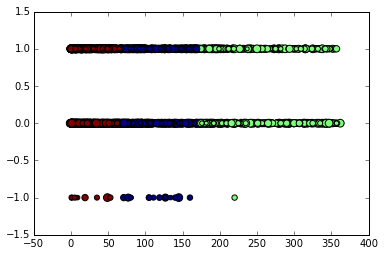

In [8]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], X.iloc[:, 2],c=y_pred)

In the first two horizontal lines, the clustering is obviously not viable.<br>
Yet the last line is showing three different clusters. We would need lot more data to confirm that first draft of clustering with respect to the age of the account, the gender and the age of the user

###Using PCA to find some groups of users

In [9]:
#Perform PCA on the data matrix X, extracting the first m principal components
#Parameters :  X : N x D array : Data matrix with N observations. Each observation (row) is D dimensional
            #m: integer: Number of principal components to compute.
#Returns: E : N x m array: Normalized data matrix, projected on to the m principal components
             #U : m x D array: Loadings of the first m principal components
def pca(X,m):
    Xs, mean, std = standardize(X)
    U = compute_eigenvectors(Xs, m)
    E = project(Xs, U)
    return E, U

#Standardize each column of X to zero mean and unit variance
def standardize(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    Xs = (X - mean) / std
    assert np.allclose(np.sum(Xs, axis=0), np.zeros(len(mean)))
    return (Xs, mean, std)

#compute the m principal eigenvectors of X'X
def compute_eigenvectors(X, m):
    X_covar = np.dot( X.T, X)
    X_eigval, X_eigvec = np.linalg.eig(X_covar)

    idx = X_eigval.argsort()[::-1]
    X_eigval = X_eigval[idx]
    X_eigvec = X_eigvec[:,idx]

    U = X_eigvec[:,:m]
    U = U.T
    return U

#Project the rows of X on the columns of U
def project(X, U):
    E = np.dot(X, U.T)
    return E

#Generate biplot from the result of pca
def biplot(scores, loadings, ax, title,label_dimension=None):
    ax.set_title(title, size = 16)
    ax.set_xlabel('First Principal Component')
    ax.set_ylabel('Second Principal Component')
    ax.grid()

    for k in xrange(len(scores)):
        pc1 = scores[k][0]
        pc2 = scores[k][1]
        ax.scatter(pc1, pc2, color='green', alpha=0.5)

    for k in xrange(len(loadings)):
        pc1 = loadings[k][0]
        pc2 = loadings[k][1]
        ax.arrow(0, 0, 2*pc1, 2*pc2, head_width=0.1, head_length=0.1,
            fc='r', ec='r')
        if label_dimension is not None:
            label = label_dimension[k]
            ax.text(2*pc1, 2*pc2 + 0.15, label, color = 'red')

In [10]:
predictors = ['age_range', 'acct_age_weeks', 'ms_played', '#tracks']
X = np.asarray(df2_concat.loc[:,predictors])

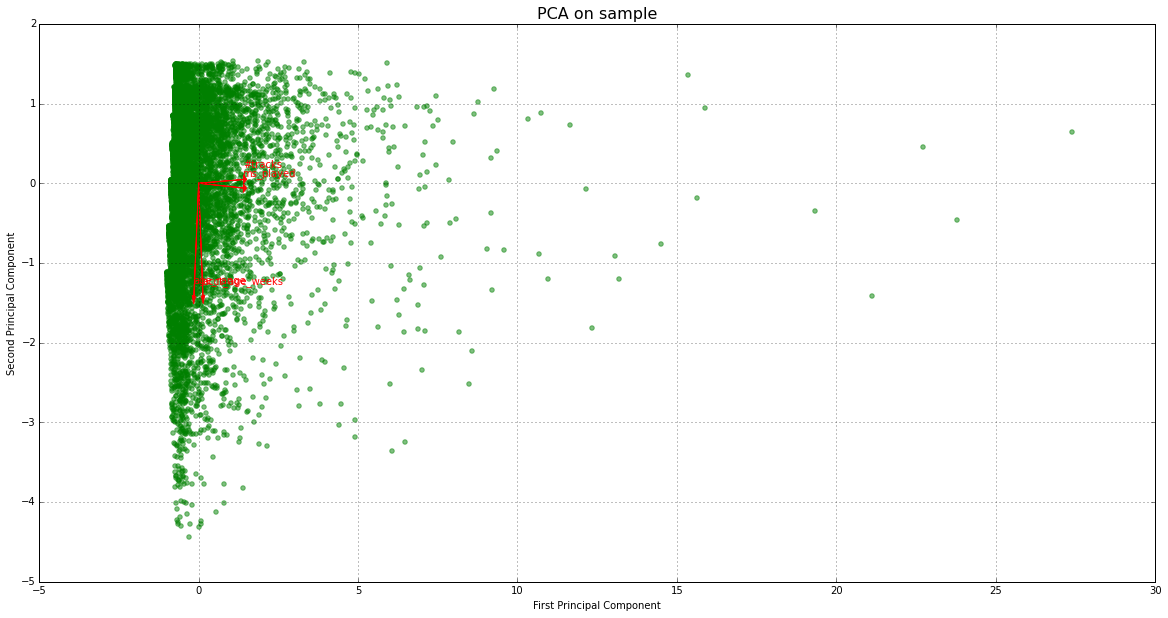

In [11]:
scores, loadings = pca(X,2)
#saving the matrix projected on the principal components as scores
#saving Loadings of the principal components as loadings
fig, ax = plt.subplots(figsize=(20,10))
biplot(scores[:,:2], loadings.T, ax, "PCA on sample",label_dimension = predictors)

In this PCA map we can see that the variance of our users evolves the same way between `#track`and `ms_played` as well as between `age_range` and `acct_age_weeks`. <br>
THe map is clearly not showing clusters but the fact that we can observe those relationship between the variance respecting our 4 variables can give us good insight on where to look at to build clusters of users.